
[NYC Coronavirus Data](https://github.com/nychealth/coronavirus-data)

- [ ] Line Chart
- [ ] Pie Chart
- [ ] Bar Chart
- [ ] Histogram
- [ ] Scatterplot
<br>
- [ ] Include URL & desc. of data
- [ ] 3 min. story
- [ ] Clearly readable, titled, labeled

In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

fig = plt.figure(figsize=(10, 20))
plt.subplots_adjust(wspace=.5, hspace=.5)

color = ['#FF9999','#CCFF99','#99FFFF','#CC99FF','#FFB266']  # softer colors

<Figure size 720x1440 with 0 Axes>

In [2]:
daily_cases = pd.read_csv("cases-by-day.csv")

ax1 = fig.add_subplot(4, 1, 1)

ax1.plot(
    daily_cases["date_of_interest"], 
    daily_cases["CASE_COUNT"], 
    color=color[0],
)

ax1.xaxis.set_major_locator(mdates.MonthLocator())
[tick.set_rotation(45) for tick in ax1.get_xticklabels()]
ax1.title.set_text("Cases by Day")

In [3]:
by_boro = pd.read_csv("by-boro.csv")
by_boro = by_boro.sort_values("CASE_COUNT", ascending=False)

ax2 = fig.add_subplot(4, 2, 3)

ax2.pie(
    by_boro["CASE_COUNT"][1:],
    colors=color,
    labels=by_boro["BOROUGH_GROUP"][1:],
    autopct="%1.1f%%"
)
ax2.title.set_text("Cases by Borough")

In [4]:
ax3 = fig.add_subplot(4, 2, 4)

ax3.bar(
    by_boro["BOROUGH_GROUP"][1:],
    by_boro["CASE_COUNT"][1:],
    color=color
)
[tick.set_rotation(45) for tick in ax3.get_xticklabels()]
ax3.title.set_text("Cases by Borough")

In [5]:
ax4 = fig.add_subplot(4, 1, 3)

ax4.hist(
    daily_cases["CASE_COUNT"],
    color=color[0]
)

(array([172.,  39.,  27.,  22.,  32.,  35.,   9.,  20.,  11.,   5.]),
 array([   0. ,  655.3, 1310.6, 1965.9, 2621.2, 3276.5, 3931.8, 4587.1,
        5242.4, 5897.7, 6553. ]),
 <BarContainer object of 10 artists>)

In [6]:
ax5 = fig.add_subplot(4, 1, 4)

ax5.scatter(
    daily_cases["date_of_interest"],
    daily_cases["BX_CASE_COUNT"],
    label="Bronx"
)
ax5.scatter(
    daily_cases["date_of_interest"],
    daily_cases["BK_CASE_COUNT"],
    label="Brooklyn"
)
ax5.scatter(
    daily_cases["date_of_interest"],
    daily_cases["QN_CASE_COUNT"],
    label="Queens"
)
ax5.scatter(
    daily_cases["date_of_interest"],
    daily_cases["MN_CASE_COUNT"],
    label="Manhattan"
)
ax5.scatter(
    daily_cases["date_of_interest"],
    daily_cases["SI_CASE_COUNT"],
    label="Staten Island"
)

ax5.xaxis.set_major_locator(mdates.MonthLocator())
[tick.set_rotation(45) for tick in ax5.get_xticklabels()]
ax5.title.set_text("Cases by Day by Borough")
ax5.legend(loc='upper left');

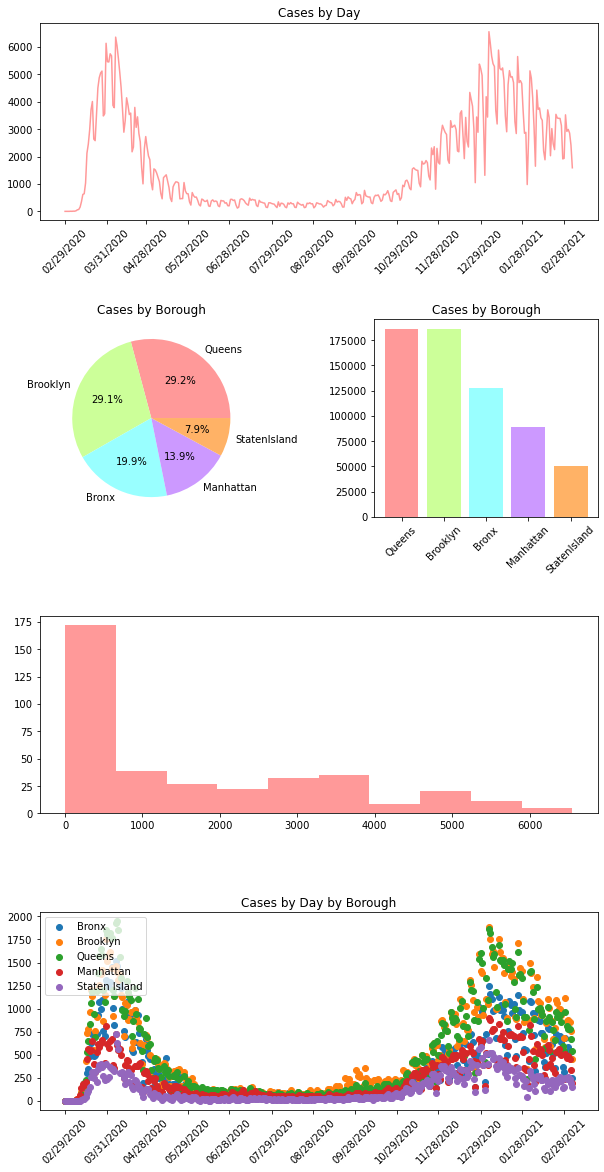

In [7]:
fig